# Respuesta a una función impulso

Al introducir un impulso de área $A$ se obtiene la siguiente respuesta:

$$y (s) = \frac{K_p}{\tau_p s + 1} A$$ 

que en tiempo real es:


$$y (t) = \frac{K_p A}{\tau_p} \mathrm{e}^{- \frac{t}{\tau_p}}$$

Como en el caso de una entrada en escalón, podemos reproducir con Sympy el cálculo de la respuesta de un proceso de primer orden a una entrada en escalón:

In [1]:
using SymPy, Plots, LaTeXStrings

t, Kp, A = symbols("t K_p A", real=True)
τp = symbols("tau_p", positive=True)
s = symbols("s")

f = A
G = Kp/(τp*s + 1)

y = sympy.inverse_laplace_transform(G*f, s, t)
y

      -t      
      ───     
       τₚ     
A⋅Kₚ⋅ℯ   ⋅θ(t)
──────────────
      τₚ      

De forma adimensional se puede escribir:

$$\frac{y (t)}{K_p A} = \mathrm{e}^{- \frac{t}{\tau_p}}$$

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Respuesta de un sistema de primer orden a una entrada impulso unidad.
```


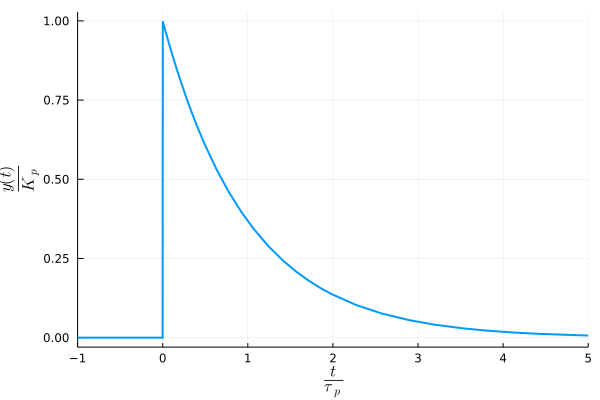

In [2]:
plot(y(A=>1, Kp=>1, τp=>1), xlimit = (-1, 5), lw = 2,
    label = "", xlabel = L"\frac{t}{\tau_p}",
    ylabel = L"\frac{y(t)}{K_p}")

Se obtiene la función simétrica a la respuesta a una entrada en escalón, lo que
implica que tiene las mismas características.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
En la figura se muestra la respuesta de un sistema de primer orden a una entrada en escalón unidad y a un impulso unidad.
```

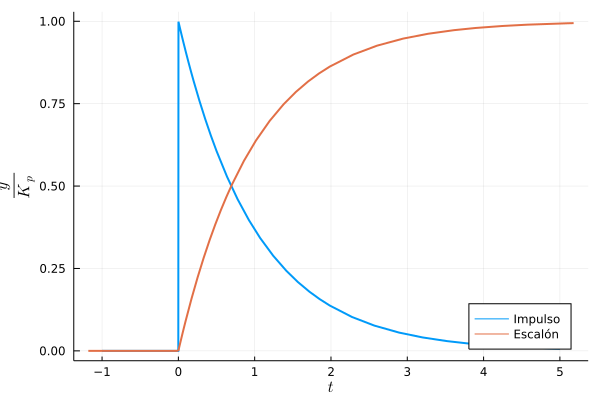

In [4]:
y_imp = subs(sympy.inverse_laplace_transform(G*f, s, t), A => 1, Kp => 1, τp => 1)

y_esc = subs(sympy.inverse_laplace_transform(G*A/s, s, t), A => 1, Kp => 1, τp => 1)

plot(y_imp, -1, 5, lw = 2, label="Impulso", legend=:bottomright,
    xlabel=L"t", ylabel=L"\frac{y}{K_p}")
plot!(y_esc, lw = 2, label = "Escalón")